In [292]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
import re
from pylab import rcParams
rcParams['figure.figsize'] = 13,6
data_1 = pd.read_csv('googleplaystore.csv')
data = data_1.dropna() #Удалю строки с Nan

In [293]:
data_1.info()
#Основная часть пустых ячеек в стлолбце с оценками

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [294]:
q1 = data_1.Rating.quantile(0.25)
q3 = data_1.Rating.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers = data_1[data_1.Rating.between(lower_bound, upper_bound, inclusive = True)]
pd.concat([data_1, remove_outliers]).drop_duplicates(keep = False).head(40)
#print(q1, q3)
#Если в оценке nan, то, в основном, у приложения мало обзоров. Вероятно, приложение новое, и для него не сформирована оценка.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
87,RST - Sale of cars on the PCT,AUTO_AND_VEHICLES,3.2,250,1.1M,"100,000+",Free,0,Everyone,Auto & Vehicles,"April 27, 2018",1.4,4.0.3 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
130,Recipes and tips for losing weight,BEAUTY,NaN,35,3.1M,"10,000+",Free,0,Everyone 10+,Beauty,"December 11, 2017",2.0,3.0 and up
134,"Lady adviser (beauty, health)",BEAUTY,NaN,30,9.9M,"10,000+",Free,0,Mature 17+,Beauty,"January 24, 2018",3.0,3.0 and up
163,Anonymous caller detection,BOOKS_AND_REFERENCE,NaN,161,2.7M,"10,000+",Free,0,Everyone,Books & Reference,"July 13, 2018",1.0,2.3 and up


In [295]:
#Прихожу столбцы в формат, нужный для работы
data['Reviews'] = data['Reviews'].astype('int') #Меняю тип object на int
data['Installs'] = data['Installs'].str.replace('+','').str.replace(',','').astype('int') #Удаляю символы и меняю тип object на int
data['Price'] = data['Price'].str.replace('$','').astype('float64')
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size               object
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [296]:
app_by_category = data[['App', 'Category']].groupby('Category').count().sort_values('App', ascending = False) #Сортирую таблицу по количеству приложений и их категориям
installs_by_category = data[['Installs', 'Category']].groupby('Category').sum().sort_values('Installs', ascending = False) #Сортирую таблицу по количеству установок и категориям

<AxesSubplot:title={'center':'Correlation between Price and Installs'}, xlabel='Price', ylabel='Installs'>

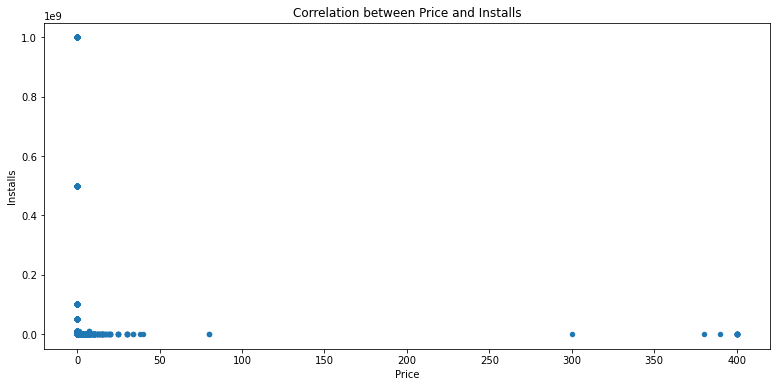

In [297]:
data.plot(kind='scatter', 
        x='Price', 
        y='Installs', 
        title='Correlation between Price and Installs')

In [298]:
for i in data.Price: #Заменю строки с ценами более 50$ для наглядности
    if i > 50:
        data.Price = data.Price.replace(i, data.Price.mode()[0])

<AxesSubplot:title={'center':'Correlation between Price and Installs'}, xlabel='Price', ylabel='Installs'>

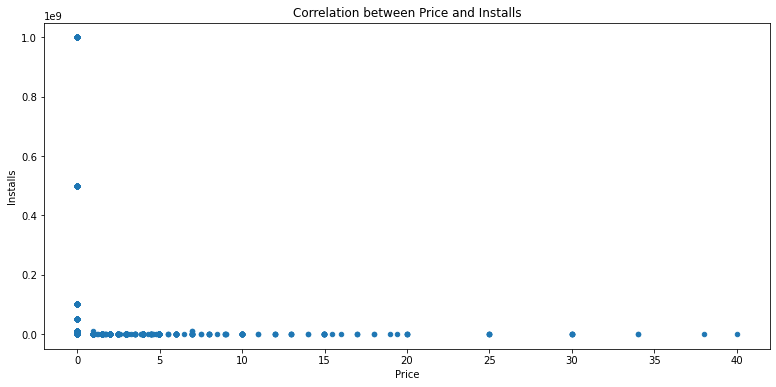

In [299]:
data.plot(kind='scatter', 
        x='Price', 
        y='Installs', 
        title='Correlation between Price and Installs')
#Крайне большое количество скачиваний имеется только у бесплатных приложений

<AxesSubplot:title={'center':'USer Score distribution'}, ylabel='Frequency'>

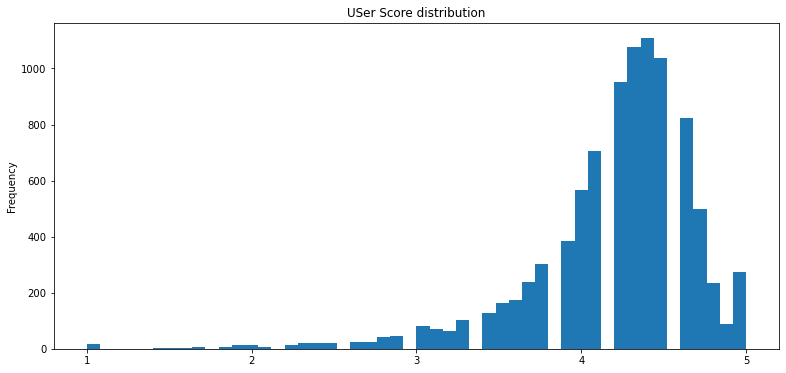

In [300]:
data.Rating.plot(kind='hist', 
                   bins=50,
                   title='USer Score distribution',
                   xlabel='USer score',
                   ylabel='Games',
                   xticks=range(1, 6))
#Самый частый рейтинг 4,5

<AxesSubplot:title={'center':'Correlation between Rating and User Reviews'}, xlabel='Rating', ylabel='Reviews'>

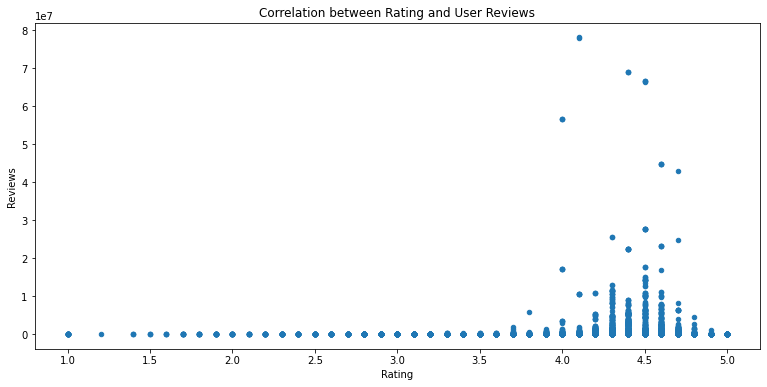

In [301]:
data.plot(kind='scatter', 
        x='Rating', 
        y='Reviews', 
        title='Correlation between Rating and User Reviews')
#Чем выше рейтинг, тем больше комментариев

<AxesSubplot:title={'center':'Number of installs by Category'}, xlabel='Category', ylabel='Number of installs'>

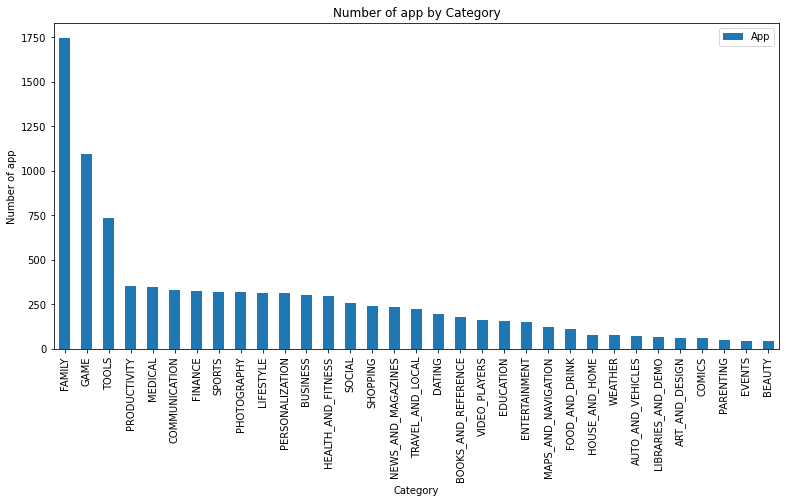

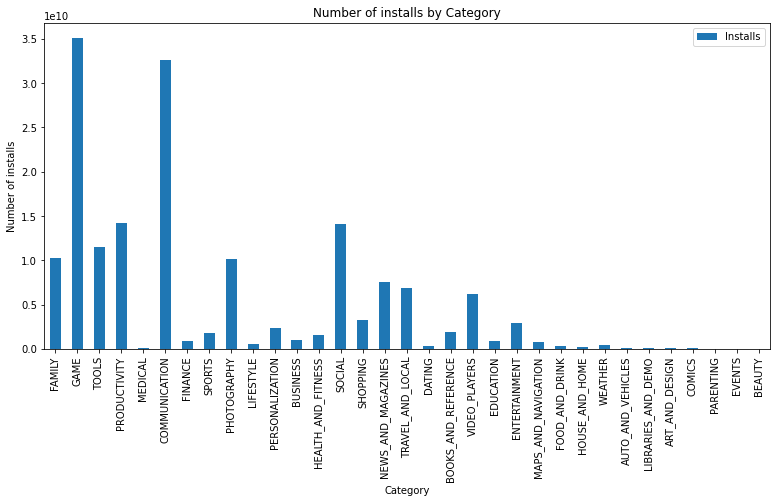

In [302]:
app_by_category.loc[category].plot(kind='bar', 
                                    title='Number of app by Category',
                                    xlabel='Category',
                                    ylabel='Number of app')
installs_by_category.loc[category].plot(kind='bar', 
                                    title='Number of installs by Category',
                                    xlabel='Category',
                                    ylabel='Number of installs')
#Больше все приложений в категории Family, но это количество не перерастает в количество установок 